<a href="https://colab.research.google.com/github/SriVarshini15/Data-Science/blob/main/BankPersonalLoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#Dataset

In [110]:
df = pd.read_csv("/content/Bank_Personal_Loan_ModellingAssessment1.csv")
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [111]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [112]:
print(df.describe())

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

In [113]:
df = df.drop(['ID', 'ZIP Code'], axis=1)

#Preprocessing Data

In [114]:
df = df.fillna(df.median())

In [115]:
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Family'] = encoder.fit_transform(df['Family'])

#Setting Features

In [116]:
features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
X = df[features]

#Scaling

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.head())

        Age  Experience    Income     CCAvg  Mortgage
0 -1.774417   -1.666078 -0.538229 -0.193385 -0.555524
1 -0.029524   -0.096330 -0.864109 -0.250611 -0.555524
2 -0.552992   -0.445163 -1.363793 -0.536736 -0.555524
3 -0.901970   -0.968413  0.569765  0.436091 -0.555524
4 -0.901970   -1.055621 -0.625130 -0.536736 -0.555524


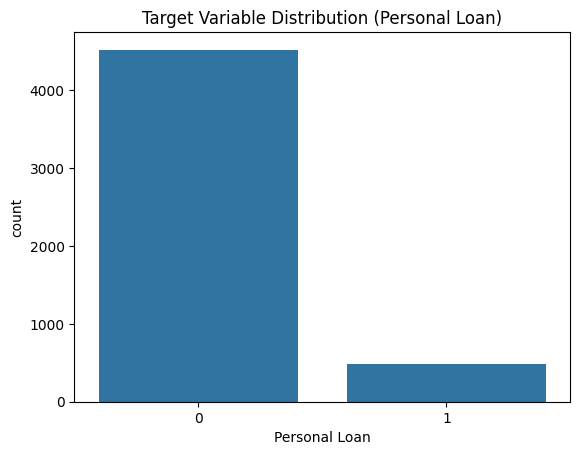

In [119]:
sns.countplot(x='Personal Loan', data=df)
plt.title('Target Variable Distribution (Personal Loan)')
plt.show()

In [120]:
y = df['Personal Loan']
X = X_scaled_df

#train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Logistic Regression

In [122]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [123]:
y_pred= log_reg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       895
           1       0.63      0.30      0.41       105

    accuracy                           0.91      1000
   macro avg       0.78      0.64      0.68      1000
weighted avg       0.89      0.91      0.89      1000

ROC-AUC: 0.9389837722798616


#Logistic Regression Accuracy

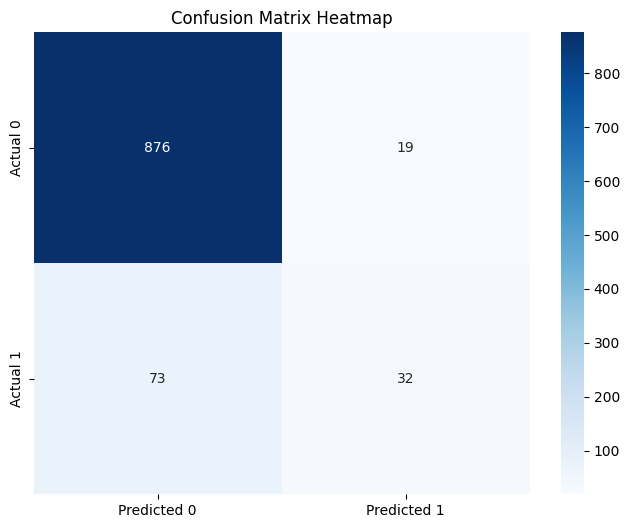

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.show()

In [125]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.908


#DecisionTreeClassifier

In [126]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       895
           1       0.73      0.68      0.70       105

    accuracy                           0.94      1000
   macro avg       0.85      0.82      0.83      1000
weighted avg       0.94      0.94      0.94      1000

ROC-AUC: 0.8235700984304337


#Decision Tree Accuracy

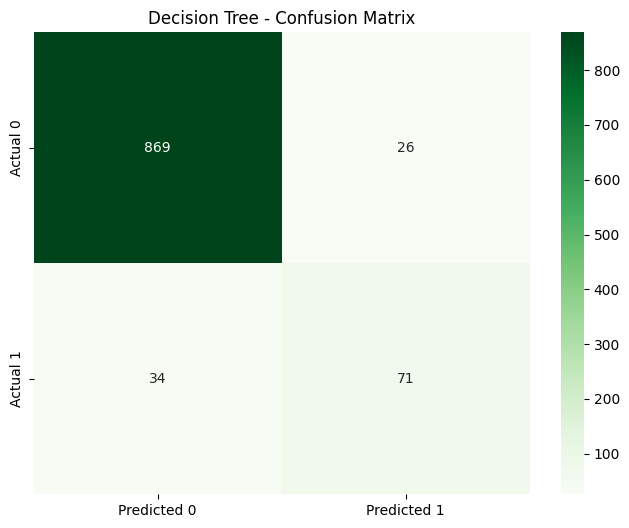

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree - Confusion Matrix')
plt.show()

In [128]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.94


#RandomForestClassifier

In [129]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       895
           1       0.81      0.55      0.66       105

    accuracy                           0.94      1000
   macro avg       0.88      0.77      0.81      1000
weighted avg       0.93      0.94      0.93      1000

ROC-AUC: 0.9710029263101888


#Random Forest Accuracy

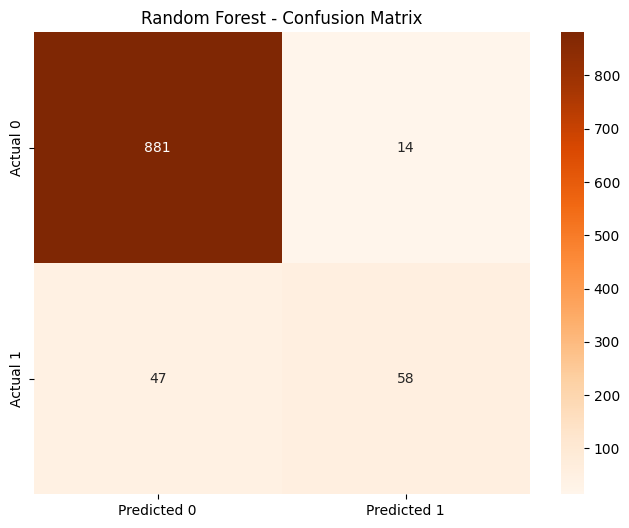

In [130]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest - Confusion Matrix')
plt.show()

In [131]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.939
